# Data Acquisition Exercises

In [206]:
import pandas as pd
import numpy as np
import os

# acquire
from env import get_connection
from pydataset import data
import seaborn as sns

#### 4. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

    a. print the first 3 rows
    b. print the number of rows and columns (shape)
    c. print the column names
    d. print the data type of each column
    e. print the summary statistics for each of the numeric variables


In [207]:
# Load iris data set
df_iris = data('iris')
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


### a. Print the first 3 rows.

In [208]:
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


### b. Print the number of rows and columns (shape).

In [209]:
df_iris.shape

(150, 5)

### c. Print the column names.

In [210]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

### d. Print the data type of each column.

In [211]:
# Return only data types
df_iris.dtypes

# Return columns and data types
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


### e. Print the summary statistics for each of the numeric variables. 

In [212]:
# The .T function will transpose the DF to make it more readable
stats = df_iris.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


#### 5. Read the data from a Google sheet into a dataframe, df_google.

    a. print the first 3 rows
    b. print the number of rows and columns
    c. print the column names
    d. print the data type of each column
    e. print the summary statistics for each of the numeric variables
    f. print the unique values for each of your categorical variables

[use this google sheet](https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357)

In [213]:
# Grab the Google sheet url.
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

In [214]:
# Turn Google sheet address into a CSV export URL.
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [215]:
# Read in the data using the pandas `pd.read_csv()` function.
df_google = pd.read_csv(csv_export_url)

### a. Print the first 3 rows.

In [216]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### b. Print the number of rows and columns.

In [217]:
df_google.shape

(891, 12)

### c. Print the column names.

In [218]:
df_google.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

### d. Print the data type of each column.

In [219]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### e. Print the summary statistics for each of the numeric variables.

- Some of these numeric columns are really like encoded categorical values; at this stage, I'm just noting this observation.

In [220]:
df_google.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### f. Print the unique values for each of your categorical variables.

- Some of these categorical variable columns have a ton of unique values, so I'll check the number first. If I want to see the unique values, I can do a `.value_counts()` on individual columns.


In [221]:
# I could get a count of unique values for each variable with an object data type.
for col in df_google.columns:
#     print(col)
    if df_google[col].dtypes == 'object':
        print(f'{col} has {df_google[col].nunique()} unique values.')

Name has 891 unique values.
Sex has 2 unique values.
Ticket has 681 unique values.
Cabin has 147 unique values.
Embarked has 3 unique values.


In [222]:
df_google.Survived.value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

In [223]:
df_google.Pclass.value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [224]:
df_google.Sex.value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

In [225]:
df_google.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

#### 6. Download the previous exercise's file into an excel (File → Download → Microsoft Excel). Read the downloaded file into a dataframe named df_excel.

    a. assign the first 100 rows to a new dataframe, df_excel_sample
    b. print the number of rows of your original dataframe
    c. print the first 5 column names
    d. print the column names that have a data type of object
    e. compute the range for each of the numeric variables.


In [226]:
df_excel = pd.read_excel('train.xlsx', sheet_name='train')

### a. Assign the first 100 rows to a new dataframe, `df_excel_sample`.

In [227]:
df_excel_sample = df_excel.head(100)

In [228]:
df_excel_sample.shape

(100, 12)

### b. Print the number of rows of your original dataframe.

In [229]:
df_excel.shape[0]

891

### c. Print the first 5 column names.

In [230]:
df_excel.columns[:5]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex'], dtype='object')

### d. Print the column names that have a data type of object.

In [231]:
df_excel.select_dtypes(include='object').head(0)

,Name,Sex,Ticket,Cabin,Embarked


In [232]:
df_excel.select_dtypes(include='object').columns.to_list()

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

### e. Compute the range for each of the numeric variables.

In [233]:
# Some of these numeric columms are more like encoded categorical variables.

df_excel.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [234]:
# The two columns I want to know the range on are 'Age' and 'Fare'
# I can select just the true numeric variables to declutter my results.

titanic_stats = df_excel[['Age', 'Fare']].describe().T
titanic_stats

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [235]:
titanic_stats['range'] = titanic_stats['max'] - titanic_stats['min']
titanic_stats

,count,mean,std,min,25%,50%,75%,max,range
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000,79.5800
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292,512.3292


---

<div class="alert alert-block alert-warning">

# Data Preparation Exercises

<div class="alert alert-block alert-success">

#### Using the Iris Data:
1. Use the function defined in acquire.py to load the iris data.
2. Drop the species_id and measurement_id columns.
3. Rename the species_name column to just species.
4. Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).
5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

<div class="alert alert-block alert-info">

1. Use the function defined in acquire.py to load the iris data.

In [236]:
from acquire import new_iris_data

In [237]:
df_iris = new_iris_data()
df_iris.head()

,species_id,measurement_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,1,setosa,5.1,3.5,1.4,0.2
1,1,2,setosa,4.9,3.0,1.4,0.2
2,1,3,setosa,4.7,3.2,1.3,0.2
3,1,4,setosa,4.6,3.1,1.5,0.2
4,1,5,setosa,5.0,3.6,1.4,0.2


<div class="alert alert-block alert-info">

2. Drop the species_id and measurement_id columns.

In [238]:
new_df_iris = df_iris.drop(columns=['species_id', 'measurement_id'])

In [239]:
new_df_iris.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


<div class="alert alert-block alert-info">

3. Rename the species_name column to just species.

In [240]:
# reassign dataframe with renamed column
new_df_iris = new_df_iris.rename(columns = {'species_name': 'species'})
# take a look
new_df_iris.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


<div class="alert alert-block alert-info">

4. Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

In [241]:
# ADAM SAID DON'T DO IT!

<div class="alert alert-block alert-info">

5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [242]:
# accepts the ultratransformed dataframe and returns data frame with transformations applied
def prep_iris(df):
    df = df.drop(columns= (['species_id', 'measurement_id']))
    df = df.rename(columns = {'species_name': 'species'})
    return df

In [243]:
# try new function 'prep_iris'
prepped_iris = prep_iris(new_iris_data())

# take a look
prepped_iris.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


<div class="alert alert-block alert-success">

#### Using the Titanic dataset
1. Use the function defined in acquire.py to load the Titanic data.
2. Drop any unnecessary, unhelpful, or duplicated columns.
3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.
4. Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.


<div class="alert alert-block alert-info">

1. Use the function defined in acquire.py to load the Titanic data.

In [244]:
from acquire import new_titanic_data

In [245]:
#use acquire module to import titanic data and assign to variable
titanic = new_titanic_data()
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


<div class="alert alert-block alert-info">

2. Drop any unnecessary, unhelpful, or duplicated columns.

In [246]:
new_titanic = titanic.drop(columns = ['class', 'embarked', 'passenger_id', 'deck', 'age'])
new_titanic.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,female,1,0,71.2833,Cherbourg,0
2,1,3,female,0,0,7.9250,Southampton,1
3,1,1,female,1,0,53.1000,Southampton,0
4,0,3,male,0,0,8.0500,Southampton,1


In [247]:
# check for nulls
new_titanic.isnull().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embark_town    2
alone          0
dtype: int64

In [248]:
# drop nulls from our data frame
new_titanic.dropna()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,female,1,0,71.2833,Cherbourg,0
2,1,3,female,0,0,7.9250,Southampton,1
3,1,1,female,1,0,53.1000,Southampton,0
4,0,3,male,0,0,8.0500,Southampton,1
...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Southampton,1
887,1,1,female,0,0,30.0000,Southampton,1
888,0,3,female,1,2,23.4500,Southampton,0
889,1,1,male,0,0,30.0000,Cherbourg,1


<div class="alert alert-block alert-info">

3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [249]:
# DON'T DO IT!

<div class="alert alert-block alert-info">

4. Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [250]:
def prep_titanic(titanic):
    titanic = titanic.drop(columns=['class', 'embarked', 'passenger_id', 'deck', 'age'])
    titanic = titanic.dropna()
    return titanic

In [251]:
# take a look
prepped_titanic = prep_titanic(new_titanic_data())
prepped_titanic.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,female,1,0,71.2833,Cherbourg,0
2,1,3,female,0,0,7.9250,Southampton,1
3,1,1,female,1,0,53.1000,Southampton,0
4,0,3,male,0,0,8.0500,Southampton,1


<div class="alert alert-block alert-success">

#### Using the Telco dataset
1. Use the function defined in acquire.py to load the Telco data.
2. Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.
3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.
4. Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

<div class="alert alert-block alert-info">

1. Use the function defined in acquire.py to load the Telco data.

In [252]:
from acquire import new_telco_data

In [253]:
telco = new_telco_data()
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


<div class="alert alert-block alert-info">

2. Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [254]:
new_telco = telco.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id'])
new_telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


<div class="alert alert-block alert-info">

3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [255]:
# DON'T DO IT!

<div class="alert alert-block alert-info">

4. Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [256]:
def prep_telco(telco):
    telco = telco.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id'])
    return telco

In [257]:
prepped_telco = prep_telco(new_telco_data())
prepped_telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


<div class="alert alert-block alert-success">

#### Split your data
1. Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.
2. Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, validate_iris and test_iris.
3. Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic.
4. Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.

In [258]:
from sklearn.model_selection import train_test_split

<div class="alert alert-block alert-info">

1. Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.

In [259]:
def split_data(df, target):
    train, test = train_test_split(df, train_size = 0.5, random_state=42, stratify=df[target])
    train, val = train_test_split(train, train_size = 0.7, random_state=42, stratify=train[target])
    return train, val, test

<div class="alert alert-block alert-info">

2. Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, validate_iris and test_iris.

In [260]:
train, validate, test = split_data(prepped_iris, target='species')
# take a look
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width
143,virginica,6.8,3.2,5.9,2.3
26,setosa,5.0,3.4,1.6,0.4
79,versicolor,5.7,2.6,3.5,1.0
129,virginica,7.2,3.0,5.8,1.6
54,versicolor,6.5,2.8,4.6,1.5


In [261]:
train.shape, validate.shape, test.shape

((52, 5), (23, 5), (75, 5))

<div class="alert alert-block alert-info">

3. Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic.

In [262]:
train, validate, test = split_data(prepped_titanic, target='survived')
# take a look
train.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
818,0,3,male,0,0,6.45,Southampton,1
98,1,2,female,0,1,23.00,Southampton,0
825,0,3,male,0,0,6.95,Queenstown,1
573,1,3,female,0,0,7.75,Queenstown,1
322,1,2,female,0,0,12.35,Queenstown,1


In [263]:
train.shape, validate.shape, test.shape

((310, 8), (134, 8), (445, 8))

<div class="alert alert-block alert-info">

4. Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.

In [264]:
train, validate, test = split_data(prepped_telco, target='churn')
# take a look
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
4196,5924-IFQTT,Male,0,Yes,Yes,13,Yes,Yes,No,Yes,...,Yes,Yes,No,Yes,72.8,930.05,No,Month-to-month,DSL,Electronic check
6112,8652-YHIYU,Female,0,No,Yes,16,Yes,Yes,No,No,...,Yes,No,No,Yes,79.5,1264.2,No,One year,Fiber optic,Credit card (automatic)
1347,2003-CKLOR,Male,0,No,No,66,Yes,No,No,Yes,...,No,Yes,Yes,No,99.5,6710.5,Yes,Month-to-month,Fiber optic,Electronic check
42,0071-NDAFP,Male,0,Yes,Yes,25,Yes,Yes,No internet service,No internet service,...,No internet service,No internet service,No internet service,No,25.5,630.6,No,Two year,None,Credit card (automatic)
6533,9277-JOOMO,Female,0,No,No,3,Yes,Yes,No internet service,No internet service,...,No internet service,No internet service,No internet service,No,24.6,86.35,No,Month-to-month,None,Mailed check


In [265]:
train.shape, validate.shape, test.shape

((2464, 21), (1057, 21), (3522, 21))

---

<div class="alert alert-block alert-warning">

# Exploratory Analysis Exercises

In [266]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import acquire
import prepare

<div class="alert alert-block alert-success">

Part 1
Continue in your classification_exercises.ipynb notebook. As always, add, commit, and push your changes.

Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

1. Acquire, prepare & split your data.

In [267]:
# Acquire/Prep iris data
prepped_iris = prep_iris(new_iris_data())

# Split data
train, validate, test = split_data(prepped_iris, target='species')

In [268]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width
143,virginica,6.8,3.2,5.9,2.3
26,setosa,5.0,3.4,1.6,0.4
79,versicolor,5.7,2.6,3.5,1.0
129,virginica,7.2,3.0,5.8,1.6
54,versicolor,6.5,2.8,4.6,1.5


<div class="alert alert-block alert-success">

2. Univariate Stats

<div class="alert alert-block alert-info">

a. For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

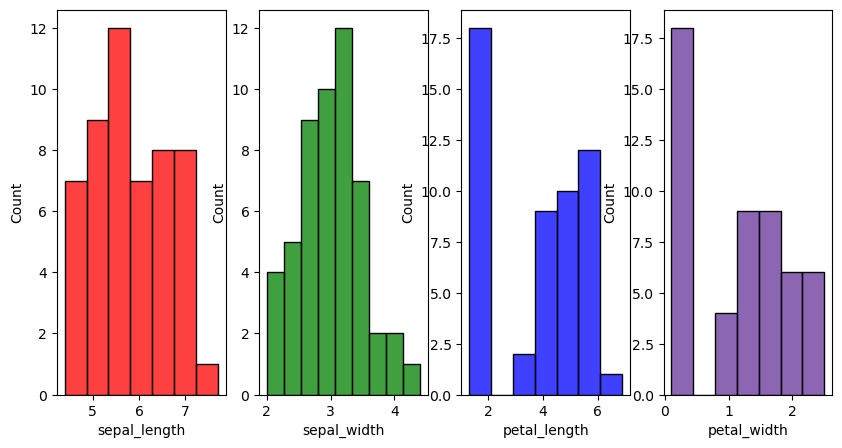

In [269]:
# Histogram for each measurement type
f, axes = plt.subplots(1, 4, figsize=(10,5))
sns.histplot(train.iloc[:,1], color="red", ax=axes[0])
sns.histplot(train.iloc[:,2], color="green", ax=axes[1])
sns.histplot(train.iloc[:,3], color="blue", ax=axes[2])
sns.histplot(train.iloc[:,4], color="rebeccapurple", ax=axes[3])
plt.show()

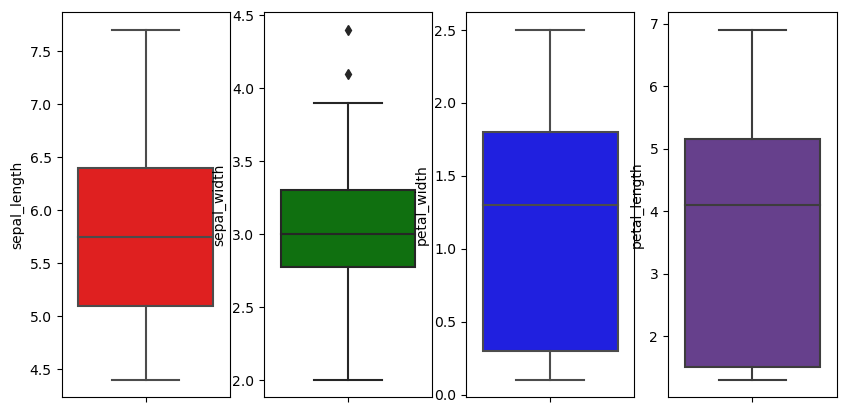

In [270]:
# Bar plots fore each measurement type
f, axes = plt.subplots(1, 4, figsize=(10,5))
sns.boxplot(y = train['sepal_length'], color = "red", ax=axes[0])
sns.boxplot(y = train['sepal_width'], color = "green", ax=axes[1])
sns.boxplot(y = train['petal_width'], color = "blue", ax=axes[2])
sns.boxplot(y = train['petal_length'], color="rebeccapurple", ax=axes[3])
plt.show()

In [271]:
# Descriptive statistics
train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,52.000000,52.000000,52.000000,52.000000
mean,5.823077,3.025000,3.734615,1.186538
std,0.816164,0.494628,1.786538,0.777131
min,4.400000,2.000000,1.300000,0.100000
25%,5.100000,2.775000,1.500000,0.300000
50%,5.750000,3.000000,4.100000,1.300000
75%,6.400000,3.300000,5.150000,1.800000
max,7.700000,4.400000,6.900000,2.500000


<div class="alert alert-block alert-info">

b. For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [272]:
# Frequency table of each species
train.species.value_counts()

setosa        18
virginica     17
versicolor    17
Name: species, dtype: int64

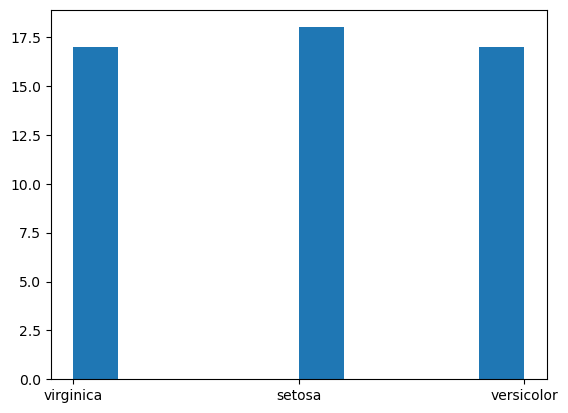

In [273]:
# Bar plot of each frequency
plt.hist(train.species)
plt.show() 

<div class="alert alert-block alert-info">

c. Document takeaways & any actions.

Takeaways:

-- It appears that all 3 species have similiar amount of samples

-- It does not look like we have a normal distribution

-- There do not appear to be any outliers in any columns except 'sepal_width'

<div class="alert alert-block alert-success">

3. Bivariate Stats

<div class="alert alert-block alert-info">

a. Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

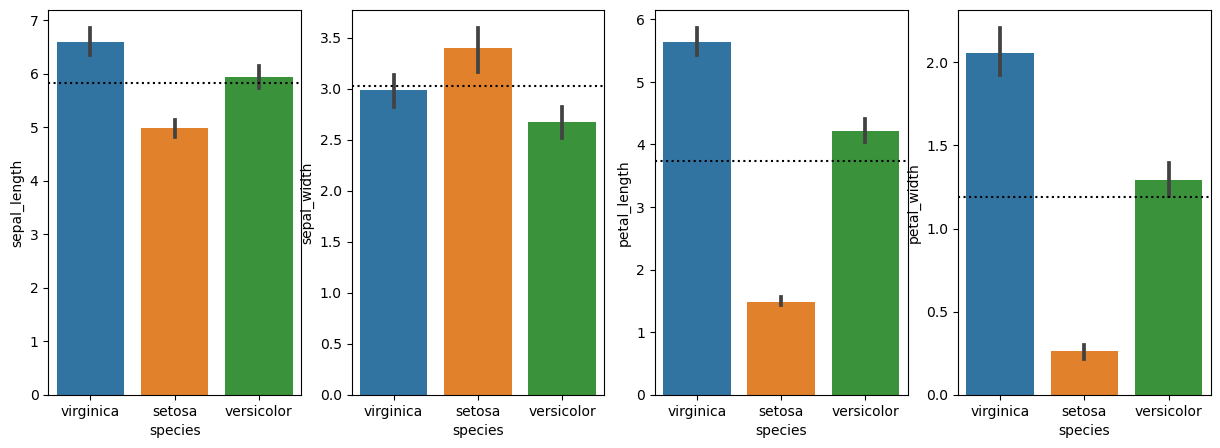

In [274]:

f, axes = plt.subplots(1, 4, figsize=(15,5))
sns.barplot(data=train, x="species", y="sepal_length",ax=axes[0])
l0 = axes[0].axhline(train.sepal_length.mean(),color='black', linestyle='dotted')
sns.barplot(data=train, x="species", y="sepal_width",ax=axes[1])
l1 = axes[1].axhline(train.sepal_width.mean(), color='black', linestyle='dotted')
sns.barplot(data=train, x="species", y="petal_length",ax=axes[2])
l2 = axes[2].axhline(train.petal_length.mean(), color='black', linestyle='dotted')
sns.barplot(data=train, x="species", y="petal_width",ax=axes[3])
L3 = axes[3].axhline(train.petal_width.mean(), color='black', linestyle='dotted')
plt.show()

<div class="alert alert-block alert-info">

b. For each measurement type, compute the descriptive statistics for each species.

In [275]:
# Virginica descriptive statistics
train[train.species == 'virginica'].describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,17.0,6.600000,0.565685,5.7,6.3,6.7,6.9,7.7
sepal_width,17.0,2.988235,0.344388,2.2,2.8,3.0,3.2,3.6
petal_length,17.0,5.629412,0.484465,5.0,5.3,5.6,5.9,6.9
petal_width,17.0,2.058824,0.293809,1.5,1.8,2.1,2.3,2.5


In [276]:
# Setosa descriptive statistics
train[train.species == 'setosa'].describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,18.0,4.977778,0.343949,4.4,4.8,5.00,5.175,5.7
sepal_width,18.0,3.394444,0.490465,2.3,3.1,3.40,3.675,4.4
petal_length,18.0,1.488889,0.136722,1.3,1.4,1.50,1.500,1.9
petal_width,18.0,0.261111,0.097853,0.1,0.2,0.25,0.300,0.4


In [277]:
# Versicolor descriptive statistics
train[train.species == 'versicolor'].describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,17.0,5.941176,0.466448,5.0,5.7,5.9,6.2,7.0
sepal_width,17.0,2.670588,0.342353,2.0,2.5,2.8,2.9,3.2
petal_length,17.0,4.217647,0.427544,3.5,4.0,4.1,4.6,4.9
petal_width,17.0,1.294118,0.210566,1.0,1.2,1.3,1.4,1.8


<div class="alert alert-block alert-info">

c. For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [278]:
virginica = train[train.species == 'virginica']
versicolor = train[train.species == 'versicolor']

t, p = stats.mannwhitneyu(virginica.petal_width, versicolor.petal_width, alternative="two-sided")
t, p

#We have a significantly lower p value than 0.05, we can reject the null hypotehsis

test_var = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for var in test_var:
    t, p = stats.mannwhitneyu(virginica[var], versicolor[var], alternative="two-sided")
    print(f'Comparing {var} between virginica and versicolor')
    print(t, p)
    print('------------------')
    print('\n')

Comparing sepal_length between virginica and versicolor
235.0 0.001891189027363391
------------------


Comparing sepal_width between virginica and versicolor
218.5 0.010846397831057763
------------------


Comparing petal_length between virginica and versicolor
289.0 6.810076212287607e-07
------------------


Comparing petal_width between virginica and versicolor
284.0 1.4532844465355982e-06
------------------




<div class="alert alert-block alert-info">

d. Document takeaways & any actions.

Takeaways:

petal_length and petal_width show the most seperation between species.

Could petal and sepal area be useful features?

* virginica iris have the largest petals.
* versicolor iris have the smallest petals.
* versicolor seem to have wide & short sepals.

<div class="alert alert-block alert-success">

4. Multivariate Stats

<div class="alert alert-block alert-info">

a. Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

In [279]:
#create new column that is area
train['sepal_area'] = train['sepal_length'] * train['sepal_width']
train['petal_area'] = train['petal_length'] * train['petal_width']
train.drop(columns="species")

#let's look at our new dataframe
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
143,virginica,6.8,3.2,5.9,2.3,21.76,13.57
26,setosa,5.0,3.4,1.6,0.4,17.00,0.64
79,versicolor,5.7,2.6,3.5,1.0,14.82,3.50
129,virginica,7.2,3.0,5.8,1.6,21.60,9.28
54,versicolor,6.5,2.8,4.6,1.5,18.20,6.90


In [280]:
#import itertools

#list(itertools.combinations(train.drop(columns='species').columns, 2))

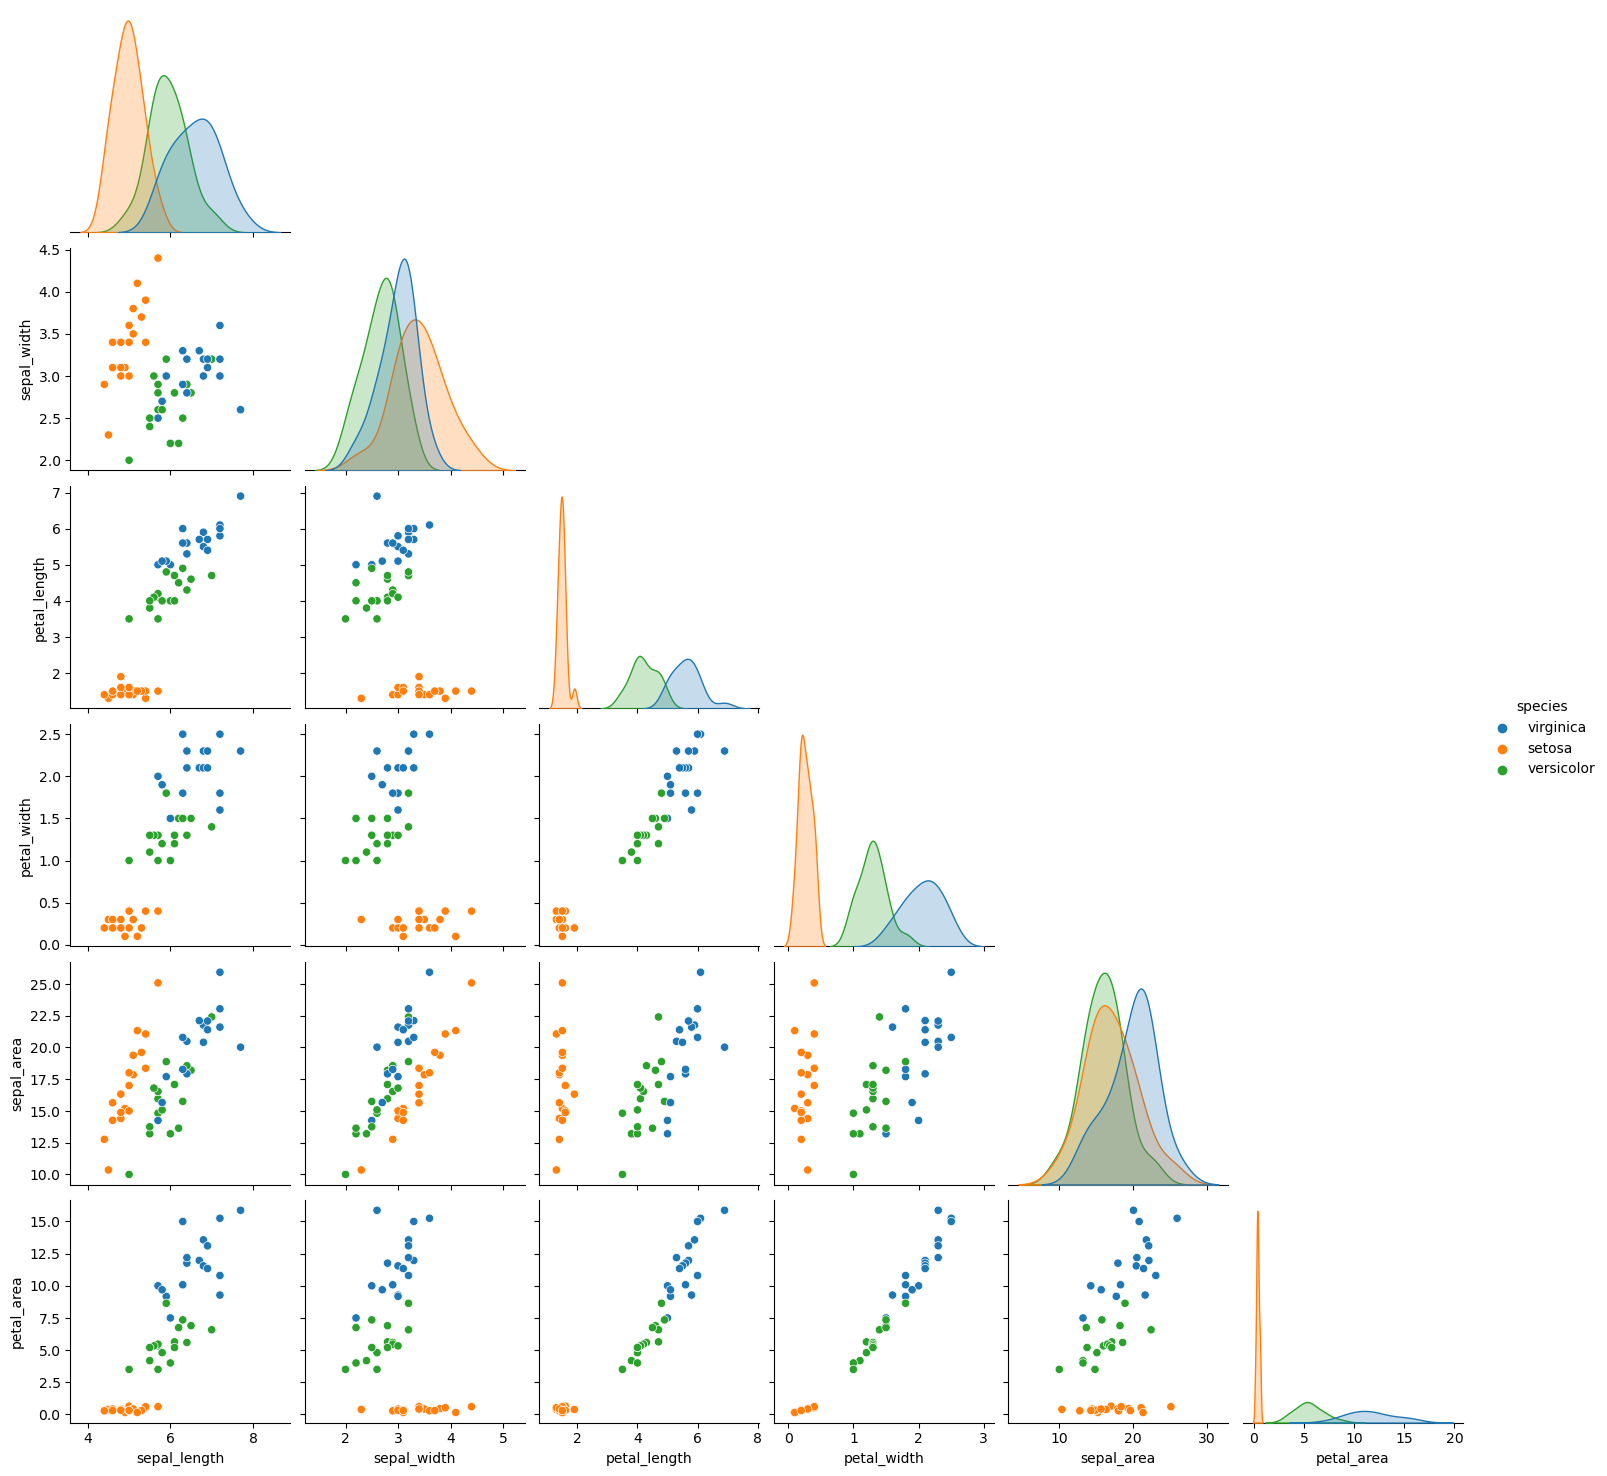

In [281]:
sns.pairplot(train, hue='species', corner=True)
plt.show()

<div class="alert alert-block alert-info">

b. Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

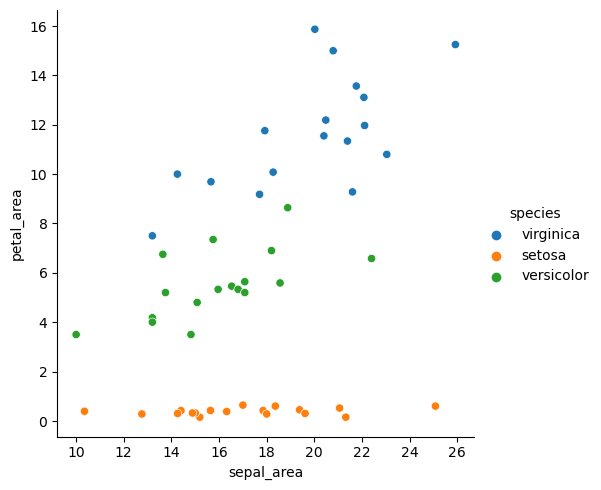

In [282]:
sns.relplot(x='sepal_area', y='petal_area', data=train, hue='species')

<div class="alert alert-block alert-info">

c. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [283]:
# DON'T DO THIS!

<div class="alert alert-block alert-info">

d. Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

In [284]:
#We can check to see if there is correlation between variables
train.corr()

/var/folders/k8/ltyv8jfd0b54p8nfncshc01w0000gn/T/ipykernel_33817/1906947707.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
sepal_length,1.000000,-0.096656,0.890335,0.853731,0.625788,0.869524
sepal_width,-0.096656,1.000000,-0.373109,-0.285784,0.711255,-0.215117
petal_length,0.890335,-0.373109,1.000000,0.968889,0.340014,0.956710
petal_width,0.853731,-0.285784,0.968889,1.000000,0.389498,0.983504
sepal_area,0.625788,0.711255,0.340014,0.389498,1.000000,0.453756
petal_area,0.869524,-0.215117,0.956710,0.983504,0.453756,1.000000


Hypothesis

alpha = .05

$H_0$ : Sepal length is the same in virginica and setosa. 

$H_a$ : Sepal length significantly different in virginica and setosa. 

In [285]:
alpha = 0.05

In [286]:
virginica = train[train['species'] == 'virginica']
setosa = train[train['species'] == 'setosa']

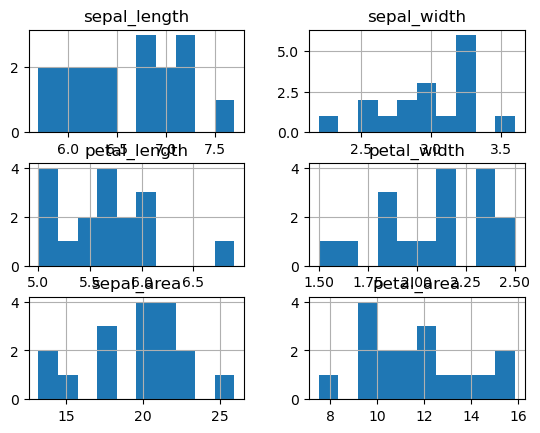

In [287]:
virginica.hist()
plt.show()

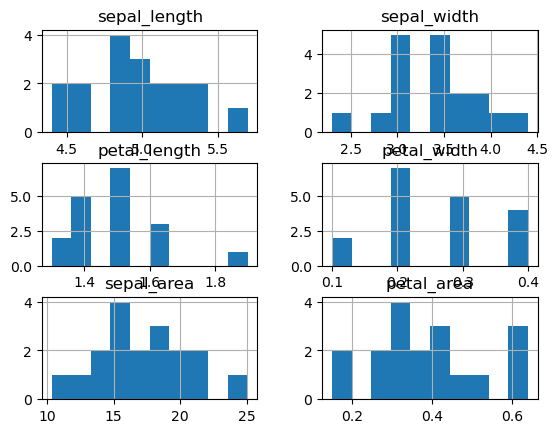

In [288]:
setosa.hist()
plt.show()

In [289]:
virginica.sepal_length.var()

0.32000000000000006

In [290]:
setosa.sepal_length.var()

0.11830065359477135

In [291]:
tstat, p = stats.ttest_ind(virginica.sepal_length, setosa.sepal_length, equal_var= False)

tstat, p

(10.17957157437404, 1.3867928194259415e-10)

In [292]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


In [293]:
stats.mannwhitneyu(virginica.sepal_length, setosa.sepal_area)

MannwhitneyuResult(statistic=0.0, pvalue=4.751815625495624e-07)

<div class="alert alert-block alert-info">

e. Document takeaways and any actions.

- Sepal length can be used to distinguish setosa from the others, and can be helpful for the other 2.
- Sepal length can also help separate virginica and versicolor, as virginica is slightly shorter.
- Virginica and versicolor overlap in sepal width.
- Sepal area does not seem to add any value beyond what sepal_length already added.

<div class="alert alert-block alert-success">

Part II - Explore your titanic dataset more completely.

In [294]:
titanic = acquire.new_titanic_data()

<div class="alert alert-block alert-info">

a. Determine drivers of the target variable

 - Target Variable: Survived
 - Drivers: fare, age, class, alone

In [295]:
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


<div class="alert alert-block alert-info">

b. Determine if certain columns should be dropped

 - Drop 'class', 'embarked', 'passenger_id', 'deck'

<div class="alert alert-block alert-info">

c. Determine if it would be valuable to bin some numeric columns
* Not at this time

<div class="alert alert-block alert-info">

d. Determine if it would be valuable to combine multiple columns into one.
* Not at this time

<div class="alert alert-block alert-info">

Does it make sense to combine any features? 
* Not at this time

Do you find any surprises? 
* No

Document any and all findings and takeaways in your notebook using markdown

In [296]:
# Acquire and prep data
titanic = prep_titanic(new_titanic_data())
# Take a look
titanic.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,female,1,0,71.2833,Cherbourg,0
2,1,3,female,0,0,7.9250,Southampton,1
3,1,1,female,1,0,53.1000,Southampton,0
4,0,3,male,0,0,8.0500,Southampton,1


In [297]:
# split into train, validate, test
train, validate, test = split_data(titanic, target='survived')
# Take a look
train.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
818,0,3,male,0,0,6.45,Southampton,1
98,1,2,female,0,1,23.00,Southampton,0
825,0,3,male,0,0,6.95,Queenstown,1
573,1,3,female,0,0,7.75,Queenstown,1
322,1,2,female,0,0,12.35,Queenstown,1


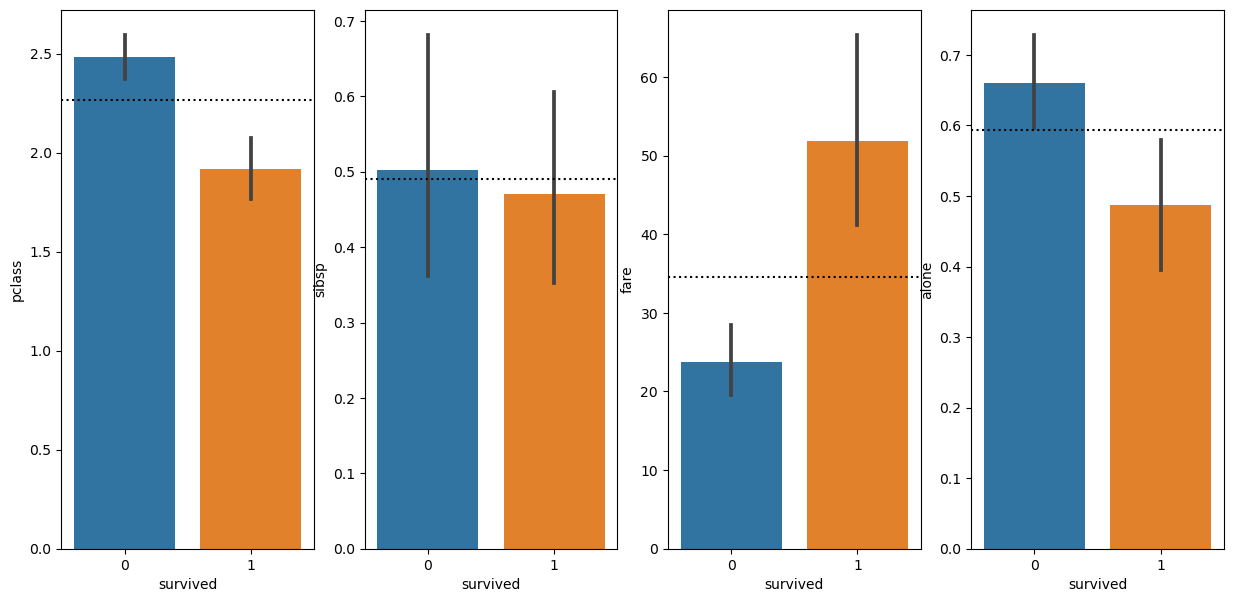

In [298]:

f, axes = plt.subplots(1, 4, figsize=(15,7))
sns.barplot(data=train, x="survived", y="pclass",ax=axes[0])
l0 = axes[0].axhline(train.pclass.mean(),color='black', linestyle='dotted')
sns.barplot(data=train, x="survived", y="sibsp",ax=axes[1])
l1 = axes[1].axhline(train.sibsp.mean(), color='black', linestyle='dotted')
sns.barplot(data=train, x="survived", y="fare",ax=axes[2])
l2 = axes[2].axhline(train.fare.mean(), color='black', linestyle='dotted')
sns.barplot(data=train, x="survived", y="alone",ax=axes[3])
l3 = axes[3].axhline(train.alone.mean(), color='black', linestyle='dotted')
plt.show()

<div class="alert alert-block alert-success">
Part III - Explore Telco data

<div class="alert alert-block alert-info">

a. Explore your telco data to discover drivers of churn

In [299]:
# Acquire and prep data
telco = prep_telco(new_telco_data())
# Take a look
telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [300]:
# split into train, validate, test
train, validate, test = split_data(telco, target='churn')
# Take a look
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
4196,5924-IFQTT,Male,0,Yes,Yes,13,Yes,Yes,No,Yes,...,Yes,Yes,No,Yes,72.8,930.05,No,Month-to-month,DSL,Electronic check
6112,8652-YHIYU,Female,0,No,Yes,16,Yes,Yes,No,No,...,Yes,No,No,Yes,79.5,1264.2,No,One year,Fiber optic,Credit card (automatic)
1347,2003-CKLOR,Male,0,No,No,66,Yes,No,No,Yes,...,No,Yes,Yes,No,99.5,6710.5,Yes,Month-to-month,Fiber optic,Electronic check
42,0071-NDAFP,Male,0,Yes,Yes,25,Yes,Yes,No internet service,No internet service,...,No internet service,No internet service,No internet service,No,25.5,630.6,No,Two year,None,Credit card (automatic)
6533,9277-JOOMO,Female,0,No,No,3,Yes,Yes,No internet service,No internet service,...,No internet service,No internet service,No internet service,No,24.6,86.35,No,Month-to-month,None,Mailed check


In [301]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2464 entries, 4196 to 3925
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            2464 non-null   object 
 1   gender                 2464 non-null   object 
 2   senior_citizen         2464 non-null   int64  
 3   partner                2464 non-null   object 
 4   dependents             2464 non-null   object 
 5   tenure                 2464 non-null   int64  
 6   phone_service          2464 non-null   object 
 7   multiple_lines         2464 non-null   object 
 8   online_security        2464 non-null   object 
 9   online_backup          2464 non-null   object 
 10  device_protection      2464 non-null   object 
 11  tech_support           2464 non-null   object 
 12  streaming_tv           2464 non-null   object 
 13  streaming_movies       2464 non-null   object 
 14  paperless_billing      2464 non-null   object 
 15  m

In [302]:
# Drop null values stored as whitespace    
train['total_charges'] = train['total_charges'].str.strip()
train = train[train.total_charges != '']
    
# Convert to correct datatype
train['total_charges'] = train.total_charges.astype(float)

In [303]:
# Convert churn to number values
train['churn'] = train.churn.map({'Yes': 1, 'No': 0})

In [304]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
4196,5924-IFQTT,Male,0,Yes,Yes,13,Yes,Yes,No,Yes,...,Yes,Yes,No,Yes,72.8,930.05,0,Month-to-month,DSL,Electronic check
6112,8652-YHIYU,Female,0,No,Yes,16,Yes,Yes,No,No,...,Yes,No,No,Yes,79.5,1264.20,0,One year,Fiber optic,Credit card (automatic)
1347,2003-CKLOR,Male,0,No,No,66,Yes,No,No,Yes,...,No,Yes,Yes,No,99.5,6710.50,1,Month-to-month,Fiber optic,Electronic check
42,0071-NDAFP,Male,0,Yes,Yes,25,Yes,Yes,No internet service,No internet service,...,No internet service,No internet service,No internet service,No,25.5,630.60,0,Two year,None,Credit card (automatic)
6533,9277-JOOMO,Female,0,No,No,3,Yes,Yes,No internet service,No internet service,...,No internet service,No internet service,No internet service,No,24.6,86.35,0,Month-to-month,None,Mailed check


<div class="alert alert-block alert-info">

b. Determine if certain columns should be dropped
* payment_type_id', 'internet_service_type_id', 'contract_type_id'

<div class="alert alert-block alert-info">

c. Determine if it would be valuable to bin some numeric columns
* not at this time

<div class="alert alert-block alert-info">

e. Determine if it would be valuable to combine multiple columns into one.
* not at this time

<div class="alert alert-block alert-info">

What are your drivers of churn?
* tenure, monthly charges, total charges

Does it make sense to combine any features?
* Not at this time

Do you find any surprises?
* Most data points were stored as string objects - need to convert to numerical values

Document any and all findings and takeaways in your notebook using markdown.

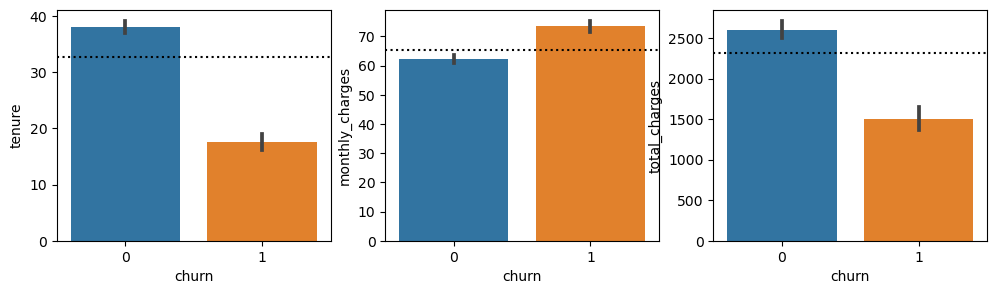

In [305]:
f, axes = plt.subplots(1, 3, figsize=(12,3))
sns.barplot(data=train, x="churn", y="tenure",ax=axes[0])
l0 = axes[0].axhline(train.tenure.mean(),color='black', linestyle='dotted')
sns.barplot(data=train, x="churn", y="monthly_charges",ax=axes[1])
l1 = axes[1].axhline(train.monthly_charges.mean(), color='black', linestyle='dotted')
sns.barplot(data=train, x="churn", y="total_charges",ax=axes[2])
l2 = axes[2].axhline(train.total_charges.mean(), color='black', linestyle='dotted')
plt.show()